In [26]:
from fastai.vision.all import *

In [27]:
path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset"
size = 224
bs = 64

In [28]:
# data = DataBlock(blocks=(ImageBlock,CategoryBlock),
#                  get_items=get_image_files,
#                  splitter=RandomSplitter(),
#                 get_y=parent_label,
#                 item_tfms=RandomResizedCrop(224,min_scale=0.3),
#                 batch_tfms=aug_transforms())

data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

In [29]:
dls = data.dataloaders(path,bs=64)

(#4) ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

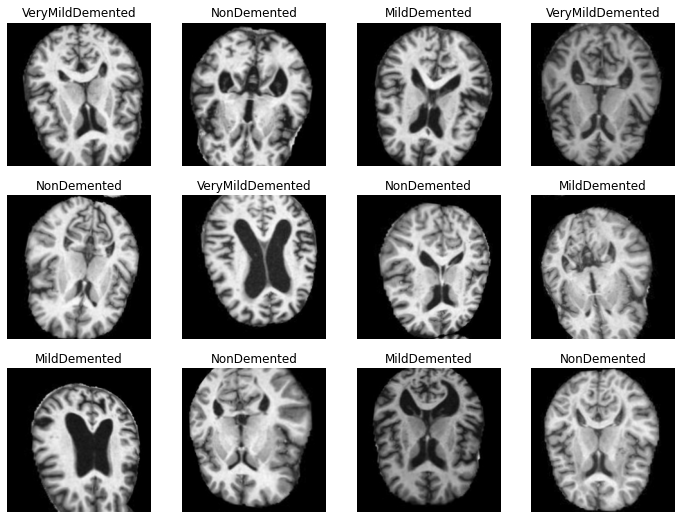

In [30]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [31]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.825170,1.242465,0.575000,00:26


epoch,train_loss,valid_loss,accuracy,time
0,1.193549,0.900954,0.638281,00:33
1,1.037184,0.895483,0.637500,00:33
2,0.856446,0.934383,0.659375,00:33
3,0.663957,0.779964,0.675000,00:32
4,0.532036,0.488297,0.791406,00:32
5,0.388267,0.423290,0.835938,00:32
6,0.271485,0.446341,0.835938,00:32
7,0.183382,0.347574,0.874219,00:32
8,0.140022,0.331484,0.878906,00:32
9,0.116650,0.293961,0.889063,00:32


In [32]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    4,096      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    36,864     True      
_________________________________________________

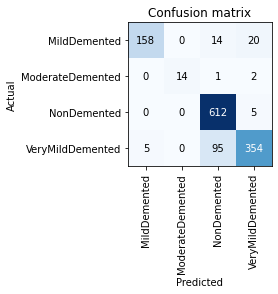

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

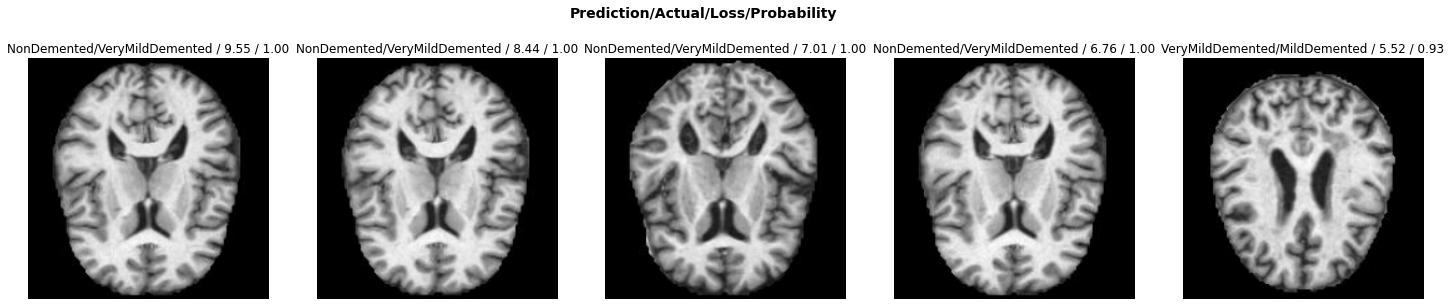

In [34]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [51]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [53]:
VBox([widgets.Label('Select an MRI scan '), btn_upload, btn_run, out_pl, lbl_pred])

In [54]:
learn.predict("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27.jpg")

('ModerateDemented',
 tensor(1),
 tensor([4.3180e-07, 9.9988e-01, 5.5392e-07, 1.1516e-04]))

In [55]:
learn.export('/kaggle/working/my_model.pkl')

In [56]:
import os
os.chdir(r'/kaggle/working')

In [57]:
from IPython.display import FileLink

FileLink(r'my_model.pkl')

/kaggle/working/my_model.pkl